# Medidas de Tendência Central

### Importando bibliotecas

- https://pandas.pydata.org/
- https://seaborn.pydata.org/

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()

### DataFrame Exemplo:

In [2]:
df = pd.DataFrame(data={"Fulano": [8,10,4,8,6,10,8],
                        "Beltrano": [10,2,0.5,1,3,9.5,10],
                        "Sicrano": [7.5,8,7,8,8,8.5,7]},
                  index=["Matemática",
                         "português",
                         "Inglês",
                         "Geografia",
                         "História",
                         "Física",
                         "Química"])

df.rename_axis("Matérias", axis="columns", inplace=True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


### Média Aritmética

## $$\mu = \frac{1}{n} \sum_{i=1}^{n} X_i$$

Representa o valor central de um conjunto de dados. É como se todos os valores fossem somados e depois igualmente repartidos.   
- **Para população:** usa-se o símbolo $\mu$  
- **Para amostra:** usa-se o símbolo $\bar{X}$
- $n$: número total de observações
- $X_i$: valor da $i$-ésima observação

#### Calculando manualmente
- Soma os elementos do conjunto e divide pela quantidade de elementos no conjunto

In [3]:
# Total de 7 elementos
(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7

7.714285714285714

#### Utilizando o pandas

In [4]:
df["Fulano"].mean()

np.float64(7.714285714285714)

### Importando dados
- dados utilizados no notebook `02-tabela-de-frequencia`

In [5]:
dados = pd.read_csv("dados.csv")
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [6]:
dados["Renda"].mean()

np.float64(2000.3831988547631)

- Para variáveis **qualitativas** não calculamos a média, para isso precisamos fazer manipulações nos dados, por exemplo a coluna sexo, já esta convertida para 0 = masculino e 1 = feminino, então conseguimos manipular, se fosse ao contrario era só convertermos

In [7]:
# Média da renda por sexo
dados.groupby(["Sexo"])["Renda"].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64


---

### $\tilde{X}$ — Mediana

- **Definição:** A mediana representa o valor central de um conjunto de dados ordenados. Ela divide os dados ao meio: 50% dos valores estão abaixo dela e 50% estão acima.
- **Símbolo:** $\tilde{X}$
- **Aplicação:** É uma medida de tendência central robusta, muito útil quando existem valores extremos **(outliers)**, já que **não** é influenciada por eles — diferente da média.

---

#### Como calcular:

1. **Ordene os dados** em ordem crescente.
2. Se o número de dados ($n$) for **ímpar**, a mediana é o valor central:

## $$\tilde{X} = X_{\frac{n+1}{2}}$$

3. Se $n$ for **par**, a mediana é a média dos dois valores centrais:
   
## $$\tilde{X} = \frac{X_{\frac{n}{2}} + X_{\frac{n}{2} + 1}}{2}$$

---

#### Exemplo (n ímpar):

Dados: 2, 5, 7, 8, 12  
$n = 5$ (ímpar), então:

## $$\tilde{X} = X_3 = 7$$

---

#### Exemplo (n par):

Dados: 3, 4, 6, 8  
$n = 4$ (par), então:

## $$\tilde{X} = \frac{X_2 + X_3}{2} = \frac{4 + 6}{2} = 5$$


#### Calculando manualmente

- #### Impar

In [8]:
notas_fulano = df["Fulano"].reset_index()
notas_fulano

,index,Fulano
0,Matemática,8
1,português,10
2,Inglês,4
3,Geografia,8
4,História,6
5,Física,10
6,Química,8


- Ordenando os dados em ordem crescente

In [9]:
notas_fulano = df["Fulano"].sort_values().reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Geografia,8
3,Matemática,8
4,Química,8
5,português,10
6,Física,10


- Temos uma quantidade impar

In [10]:
#Obetendo o a quantidade total
n = notas_fulano.shape[0]
n

7

In [11]:
# Posição do elemento
posicao_X = (n + 1) / 2
posicao_X

4.0

- Nossa mediana é o valor 8

In [12]:
notas_fulano = df["Fulano"].sort_values().reset_index()
notas_fulano.loc[posicao_X - 1]

index     Matemática
Fulano             8
Name: 3, dtype: object

#### Utilizando o pandas

In [13]:
notas_fulano["Fulano"].median()

np.float64(8.0)

- ### Par


In [14]:
notas_beltrano = df["Beltrano"].sample(6, random_state=101)
notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
português      2.0
Name: Beltrano, dtype: float64

In [15]:
notas_beltrano.sort_values().reset_index()

,index,Beltrano
0,Inglês,0.5
1,português,2.0
2,História,3.0
3,Física,9.5
4,Matemática,10.0
5,Química,10.0


In [16]:
n = notas_beltrano.shape[0]
n

6

In [17]:
posicao_elemento_1 = (n / 2)
posicao_elemento_2 = (n / 2) + 1
print(posicao_elemento_1, posicao_elemento_2)

3.0 4.0


- **Observação**: A contagem sempre começa no zero, então as posições são $3 = 2$ e $4 = 3$

In [18]:
# Resetando o index para acessar a pósição
notas_beltrano_reset = notas_beltrano.reset_index(drop=True)
soma_posicao = notas_beltrano_reset.loc[2] + notas_beltrano_reset.loc[3]
soma_posicao

np.float64(12.5)

In [19]:
mediana = soma_posicao / 2 
mediana

np.float64(6.25)

- ### Calculando com o pandas

In [20]:
notas_beltrano.median()

np.float64(6.25)

- ### Mediana no dataset

In [21]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [22]:

print(f"A renda média no nosso dataset é R$ {dados["Renda"].median()}")

A renda média no nosso dataset é R$ 1200.0


In [23]:
print(f"A altura média é de {round(dados["Altura"].median(),2)} metros")

A altura média é de 1.7 metros


In [24]:
print(f"A idade média é de {int(dados['Idade'].median())} anos")

A idade média é de 43 anos


---

### $Mo$ — Moda

- **Definição:** A **moda** é o valor que **mais se repete** em um conjunto de dados. Um conjunto pode ter **uma moda** (unimodal), **duas** (bimodal), ou **mais de duas** (multimodal), ou ainda **nenhuma moda** se todos os valores forem distintos.  
- **Símbolo:** $Mo$
- **Aplicação:** A moda é útil para identificar **tendências**, especialmente em dados **categóricos**, onde a média ou mediana podem não fazer sentido.  

---

#### Como identificar:

1. **Liste os dados** ou categorias observadas.  
2. **Conte a frequência** de cada valor.  
3. O(s) valor(es) com **maior frequência** são a(s) moda(s).

---

#### Exemplo 1 (uma moda — unimodal):

Dados: 3, 7, 4, 3, 6, 9  
O número **3** aparece **duas vezes**, mais que os outros.

## $$Mo = 3$$

---

#### Exemplo 2 (duas modas — bimodal):

Dados: 2, 5, 5, 8, 2, 9  
Os números **2** e **5** aparecem **duas vezes** cada.

## $$Mo = 2 \ \text{e} \ 5$$

---

#### Exemplo 3 (três modas — multimodal):

Dados: 1, 3, 1, 4, 4, 5, 6, 7, 3  
Os números **1**, **3** e **4** aparecem **duas vezes** cada.

## $$Mo = 1, \ 3 \ \text{e} \ 4$$

---

#### Exemplo 3 (sem moda):

Dados: 1, 2, 3, 4, 5  
Todos os valores aparecem **uma única vez**.

## $$Mo: \text{não existe}$$

---


In [25]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [26]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


Criando uma Series para exemplo de Moda multimodal

In [27]:
exemplo = pd.Series([1,2,2,3,4,4,5,6,6])
exemplo

0    1
1    2
2    2
3    3
4    4
5    4
6    5
7    6
8    6
dtype: int64

In [28]:
exemplo.mode()

0    2
1    4
2    6
dtype: int64

Verificando a moda no nosso Dataset

In [29]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [30]:
dados["Altura"].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [31]:
dados["Idade"].mode()

0    40
Name: Idade, dtype: int64

In [32]:
dados["Anos de Estudo"].mode()

0    12
Name: Anos de Estudo, dtype: int64

In [33]:
dados["Renda"].mode()

0    788
Name: Renda, dtype: int64

- ### Relação entre média, mediana e moda

![Gráficos de assimetrias](https://psicometriaonline.com.br/wp-content/uploads/2023/10/assimetriacurtose-1024x576.jpg)

#### Variavel Renda

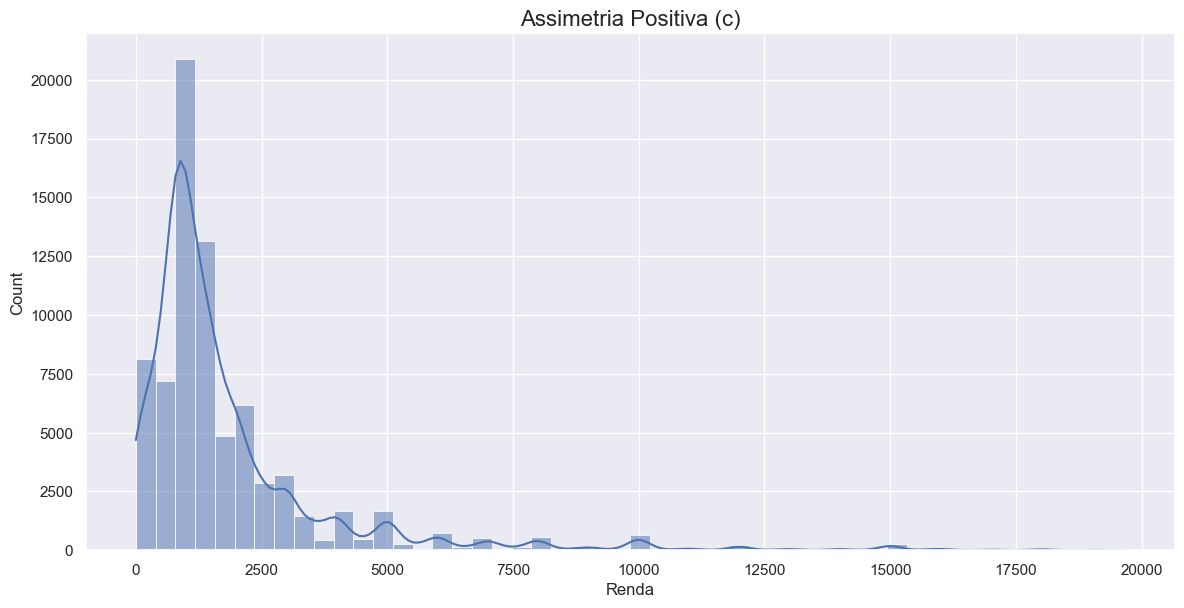

In [34]:
ax = sns.displot(dados.query("Renda < 20000").Renda, kde=True, bins=50)
ax.figure.set_size_inches(12, 6)
ax.figure.tight_layout()
ax.ax.set_title("Assimetria Positiva (c)", fontsize=16)

ax

In [35]:
moda = dados["Renda"].mode()[0]
moda

np.int64(788)

In [36]:
mediana = dados["Renda"].median()
mediana

np.float64(1200.0)

In [37]:
media = dados["Renda"].mean()
media

np.float64(2000.3831988547631)

In [38]:
moda < mediana < media

np.True_

#### Variável Altura

Text(0.5, 1.0, 'Distribuição Normal (b)')

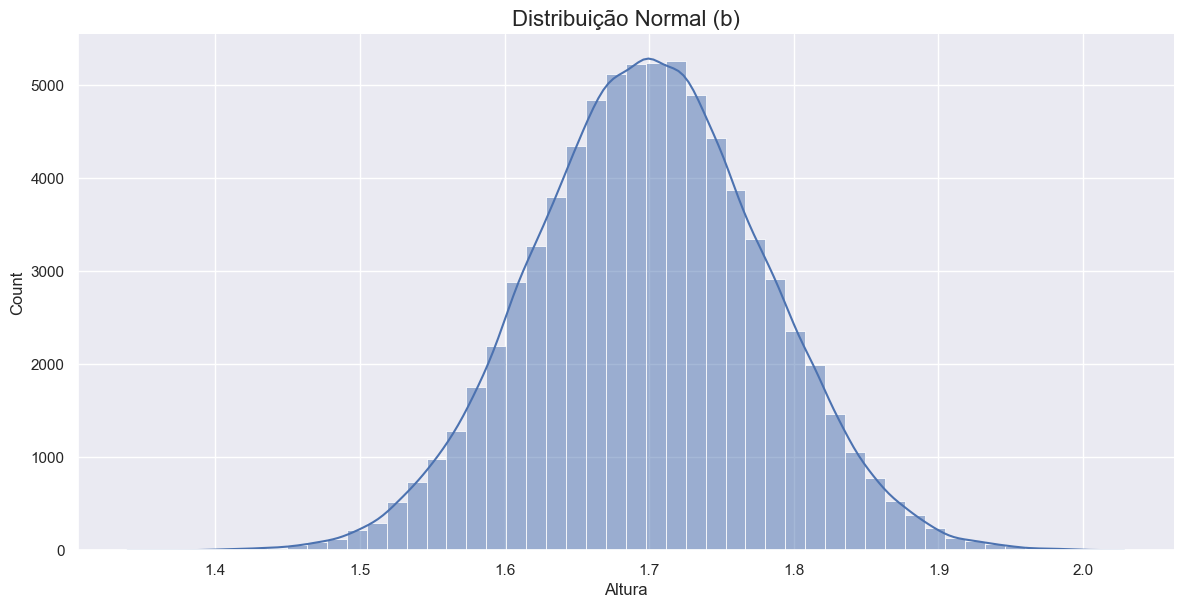

In [39]:
ax = sns.displot(dados["Altura"], kde=True, bins=50)
ax.figure.set_size_inches(12, 6)
ax.figure.tight_layout()
ax.ax.set_title("Distribuição Normal (b)", fontsize=16)

In [40]:
moda = dados["Altura"].mode()
moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [41]:
mediana = dados["Altura"].median()
mediana

np.float64(1.6993247325)

In [42]:
media = dados["Altura"].mean()
media

np.float64(1.6995124540575741)

#### Variável Anos de Estudo

Text(0.5, 1.0, 'Tendência Assimetria Negativa (a)')

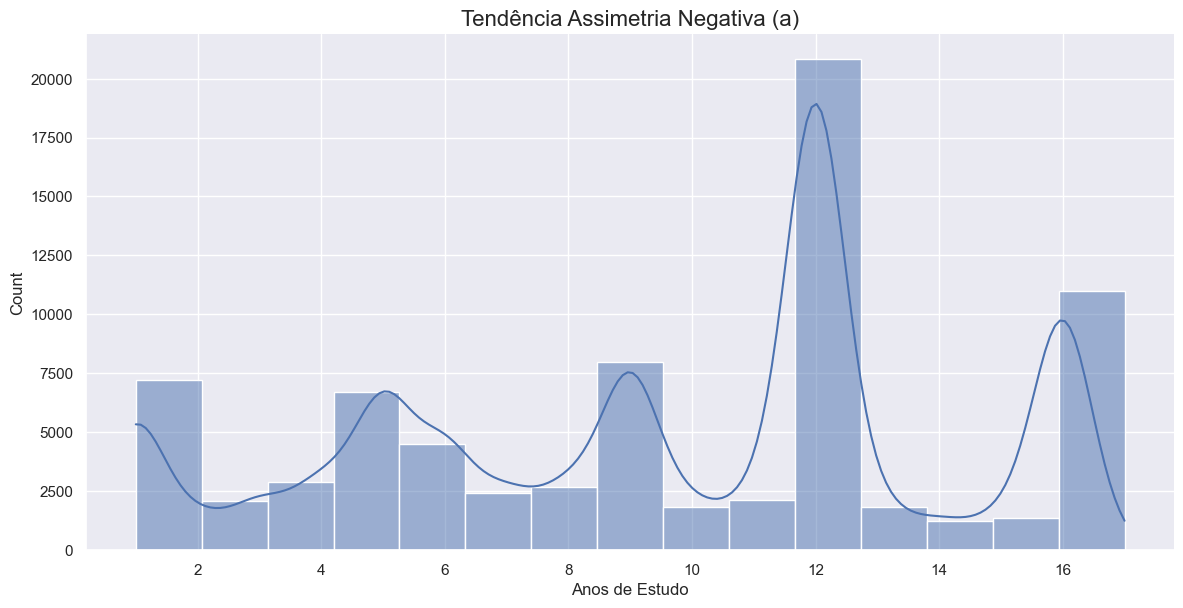

In [43]:
ax = sns.displot(dados["Anos de Estudo"], kde=True, bins=15)
ax.figure.set_size_inches(12, 6)
ax.figure.tight_layout()
ax.ax.set_title("Tendência Assimetria Negativa (a)", fontsize=16)

In [44]:
moda = dados["Anos de Estudo"].mode()[0]
moda

np.int64(12)

In [45]:
mediana = dados["Anos de Estudo"].median()
mediana

np.float64(11.0)

In [46]:
media = dados["Anos de Estudo"].mean()
media

np.float64(9.469664237376367)

In [47]:
moda > mediana > media

np.True_